# How to make a drift-diffusion plot

This notebook includes a simple function that makes a customizable drift-diffusion plot. Drift diffusion plots show how something drifts between two bounds over time. They're commonly used in models of evidence accumulation and decision making.

### import libraries and format plots

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=customPalette)

### create timeseries data

In [5]:
t = 100   #number of timepoints
n = 20    #number of timeseries
bias = 0.1  #bias in random walk

#generate "biased random walk" timeseries
data = pd.DataFrame(np.reshape(np.cumsum(np.random.randn(t,n)+bias,axis=0),(t,n)))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.062468,0.728697,-0.667352,0.223542,0.215563,-0.827614,-0.998403,-0.664819,-0.350538,0.476137,0.699937,1.598414,-0.274357,-1.436755,0.085606,-1.181137,-0.096830,0.135953,-0.287038,0.846374
1,1.020322,0.043289,-0.002054,1.188646,0.331717,-2.725796,-2.509230,-0.230101,-0.092417,0.375905,0.826539,1.672316,-0.325315,-2.138493,0.387893,-3.799147,1.171354,1.395129,0.094640,0.927567
2,0.708890,-0.067527,1.471141,1.461104,-0.614951,-4.493849,-2.486732,1.015000,1.291813,2.182614,2.256002,1.618336,-1.332588,-2.279344,0.964097,-4.315674,1.564073,1.393133,0.429482,1.255476
3,2.290734,0.242128,1.257130,1.819835,-1.763059,-2.959854,-2.945604,1.582262,0.498728,1.877125,2.500914,1.017532,-3.178745,-2.769715,0.418290,-4.194990,2.636890,2.671212,3.048426,1.100108
4,0.913785,1.170498,2.251180,0.563302,-0.986755,-2.238352,-3.097712,1.354771,0.184491,1.740376,3.822850,2.307758,-3.204027,-2.093865,1.546478,-5.600053,1.841341,2.169703,2.475502,0.862291


### define a function that creates a drift diffusion plot

In [17]:
def drift_diffusion_plot(values, upperbound, lowerbound, 
                         upperlabel='', lowerlabel='', 
                         stickybounds=True, **kwargs):
    """
    Creates a formatted drift-diffusion plot for a given timeseries.
    
    Inputs:
       - values: array of values in timeseries
       - upperbound: numeric value of upper bound
       - lowerbound: numeric value of lower bound
       - upperlabel: optional label for upper bound
       - lowerlabel: optional label for lower bound
       - stickybounds: if true, timeseries stops when bound is hit
       - kwargs: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    
    Output:
       - ax: handle to plot axis
    """
    
    #if bounds are sticky, hide timepoints that follow the first bound hit
    if stickybounds:
        #check to see if (and when) a bound was hit
        bound_hits = np.where((values>upperbound) | (values<lowerbound))[0]
        #if a bound was hit, replace subsequent values with NaN
        if len(bound_hits)>0:
            values = values.copy()
            values[bound_hits[0]+1:] = np.nan
    
    #plot timeseries
    ax = plt.gca()
    plt.plot(values, **kwargs)
    
    #format plot
    ax.set_ylim(lowerbound, upperbound)
    ax.set_yticks([lowerbound,upperbound])
    ax.set_yticklabels([lowerlabel,upperlabel])
    ax.axhline(y=np.mean([upperbound, lowerbound]), color='lightgray', zorder=0)
    ax.set_xlim(0,len(values))
    ax.set_xlabel('time')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return ax

### plot an example timeseries without sticky bounds

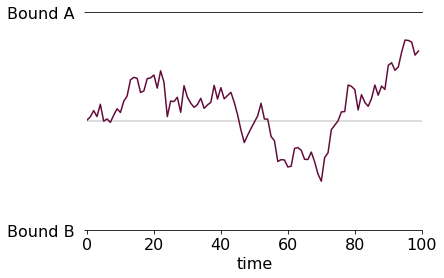

In [13]:
ax = drift_diffusion_plot(data.iloc[:,14], upperbound=10, lowerbound=-10, 
                          upperlabel='Bound A ', lowerlabel='Bound B ', 
                          stickybounds=False)

### plot an example timeseries with sticky bounds (default)

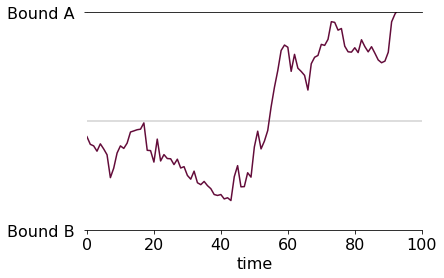

In [14]:
ax = drift_diffusion_plot(data.iloc[:,13], upperbound=10, lowerbound=-10, 
                          upperlabel='Bound A ', lowerlabel='Bound B ')

### customize plot format

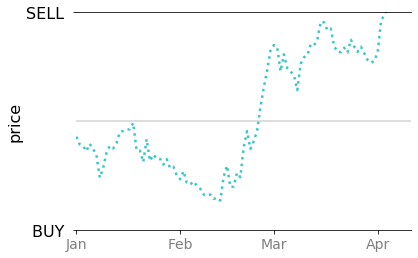

In [15]:
#you can pass in any of the kwargs that matplotlib accepts
ax = drift_diffusion_plot(data.iloc[:,13], upperbound=10, lowerbound=-10, 
                          stickybounds=False,
                          lw=2.5, ls=':', color=customPalette[1])

#return the axis to make additional changes
ax.set_xlabel('');                   #remove x label
ax.set_xticks([0,31,59,90])          #adjust x ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr'], #change x tick labels
                   size=14, color='gray'); 
ax.set_yticklabels(['BUY ','SELL ']) #add y tick labels
ax.set_ylabel('price');              #add y label


### plot all timeseries, with an overlay of the mean timeseries

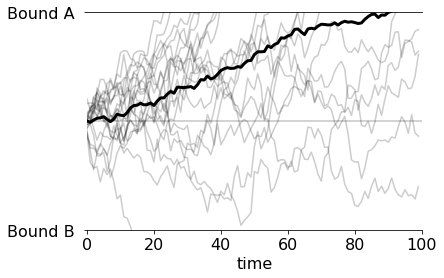

In [16]:
#plot individual timeseries
data.apply(drift_diffusion_plot, upperbound=10, lowerbound=-10, color='black', alpha=0.2);
#plot mean timeseries
drift_diffusion_plot(np.mean(data, axis=1), upperbound=10, lowerbound=-10, 
                     upperlabel='Bound A ', lowerlabel='Bound B ', 
                     color='black', lw=3);

### plot groups of timeseries

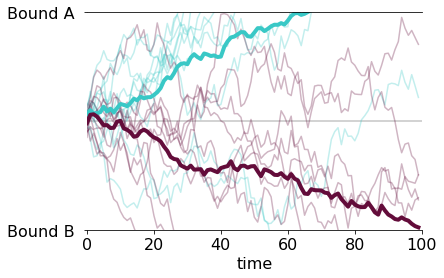

In [36]:
n=10

#group 1 (positive drift)
data1 = pd.DataFrame(np.reshape(np.cumsum(np.random.randn(t,n)+bias,axis=0),(t,n)))
data1.apply(drift_diffusion_plot, upperbound=10, lowerbound=-10, 
            color=customPalette[1], alpha=0.3);

#group 2 (negative drift)
data2 = pd.DataFrame(np.reshape(np.cumsum(np.random.randn(t,n)-bias,axis=0),(t,n)))
data2.apply(drift_diffusion_plot, upperbound=10, lowerbound=-10, 
            color=customPalette[0], alpha=0.3);

#overlay means
drift_diffusion_plot(np.mean(data1, axis=1), upperbound=10, lowerbound=-10,
                     color=customPalette[1], lw=4, alpha=1);
drift_diffusion_plot(np.mean(data2, axis=1), upperbound=10, lowerbound=-10, 
                     upperlabel='Bound A ', lowerlabel='Bound B ', 
                     color=customPalette[0], lw=4, alpha=1);